# Van der Pol
Generación de datos mediante el sistema de vanderpol

$$
\frac{d^2 \psi}{dt^2} - \mu(1-\psi^2) \frac{d\psi}{dt} +\psi = 0
$$

no lineal, por lo general complicada de tratar, solo simulable

en forma bidimensional es posible ordenarse mejor:
$$
\dot \psi = \omega
$$

$$
\dot \omega = \mu(1-\psi^2) \omega -\psi 
$$

In [8]:
# algoritmo basico
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np

from scipy.stats import uniform

[]

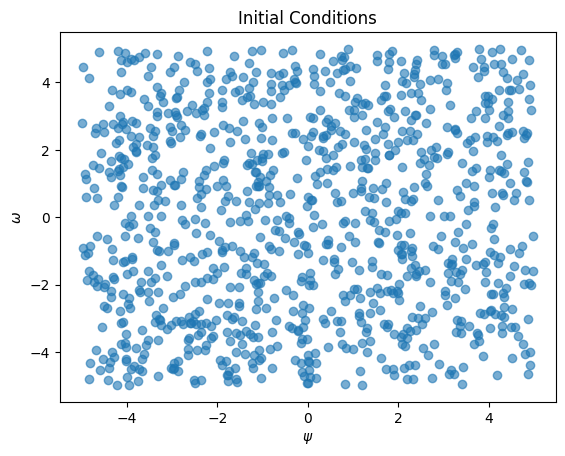

In [54]:
# condiciones iniciales aleatorias uniforme
max_psi = 5
max_omega = max_psi

n_particles = 1000

psi = max_psi * 2 * ( uniform.rvs(size=n_particles) - 0.5 )
omega = max_psi * 2 * ( uniform.rvs(size=n_particles) - 0.5 )

Z_0 = np.array([psi,omega])

#---
fig, ax = plt.subplots(1, 1)
ax.scatter(psi, omega,
    alpha=0.6, label='uniform pdf')
ax.set_xlabel(r'$\psi$')
ax.set_ylabel(r'$\omega$')
ax.set_title('Initial Conditions')
plt.plot()

In [55]:
# Tiempo
t_span = (0, 10)  # Tiempo inicial y final
t_eval = np.linspace(*t_span, 1000)  # Vector de tiempo

In [56]:
from functools import partial

def dZdt(_t, Z, mu):
    psi, omega = Z
    return [omega,
            mu * (1-psi**2) * omega - psi]

mu = 0.5

# esta linea permite argumentos extra
dZdt_with_mu = partial(dZdt, mu=mu)


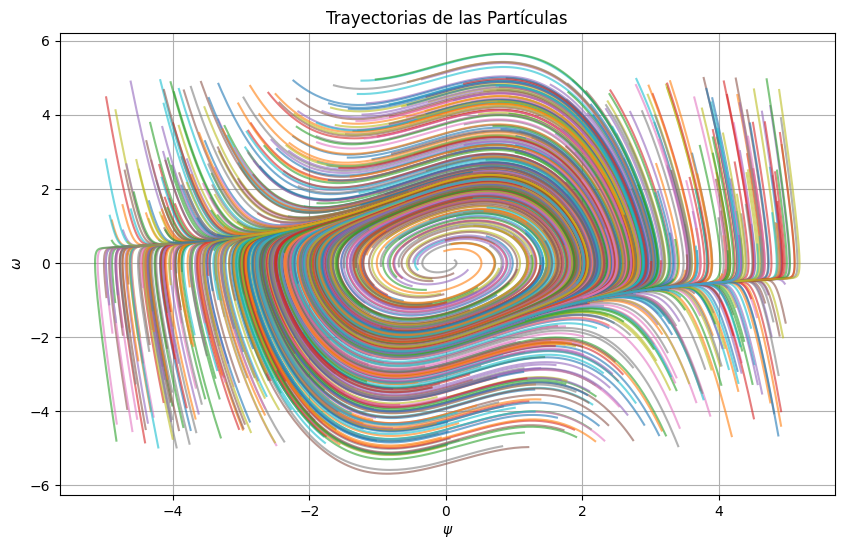

In [57]:
# resolvemos porparticula


# Resolver la ecuación para cada partícula
solutions = []
for i in range(n_particles):
    sol = solve_ivp(dZdt_with_mu, t_span, Z_0[:, i], t_eval=t_eval, vectorized=True)
    solutions.append(sol.y)

# Graficar las trayectorias de las partículas
plt.figure(figsize=(10, 6))
for i in range(n_particles):
    plt.plot(solutions[i][0], solutions[i][1], alpha=0.6)


plt.xlabel(r'$\psi$')
plt.ylabel(r'$\omega$')
plt.title('Trayectorias de las Partículas')
plt.grid()
plt.show()

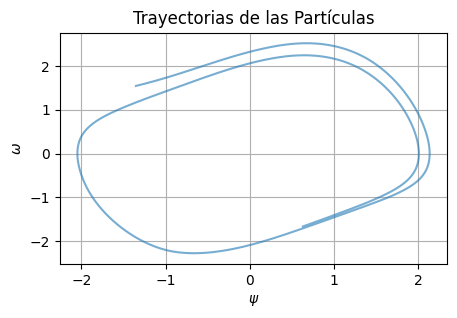

In [68]:
# Una sola particula
plt.figure(figsize=(5, 3))

i = 0
plt.plot(solutions[i][0], solutions[i][1], alpha=0.6)


plt.xlabel(r'$\psi$')
plt.ylabel(r'$\omega$')
plt.title('Trayectorias de las Partículas')
plt.grid()
plt.show()

In [63]:
# (particulas, [psi,omega], tiempos )
# (100,2,1000)
np.shape(solutions)

(1000, 2, 1000)

In [65]:
# Crear los datos
import h5py

# Suponiendo que `solutions` tiene las trayectorias de las partículas
# solutions tiene la forma (particulas, 2, tiempos)
data_file = "trayectorias.h5"

with h5py.File(data_file, "w") as hf:
    hf.create_dataset("trayectorias", data=solutions)

print("Datos guardados en", data_file)


Datos guardados en trayectorias.h5


In [66]:

# Leer los datos
import h5py
import tensorflow as tf

data_file = "trayectorias.h5"

with h5py.File(data_file, "r") as hf:
    solutions = hf["trayectorias"][:]

# Asegúrate de que las trayectorias se ajusten a tus necesidades específicas
# Si es necesario, puedes transformar los datos en tensores TensorFlow
solutions = tf.constant(solutions, dtype=tf.float32)

# Luego, puedes usar las trayectorias en TensorFlow para machine learning
